In [ ]:
# #[응용 실습시간] Decision Tree 실습
# # data : advertising.csv(광고 클릭 예측) 

# # 목표
# - 데이터 전처리
#    - 결측치
# - dt 모델링
#   - best max_depth는?
#   - 정확도 등 classificiation report
#   - 평가지표 해석
# - tree 시각화(graphviz 등)
# - 중요 변수 파악
#   - 인사이트 도출

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# 워닝 무시
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_ad = pd.read_csv("data/advertising.csv")

print(df_ad.shape)
df_ad.head(3)

(1000, 10)


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,NaN,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,3/27/2016 0:53,0
1,80.23,31.0,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,4/4/2016 1:39,0
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,3/13/2016 20:35,0


In [3]:
# 컬럼별 결측치 탐지
df_ad.isnull().sum()

Daily Time Spent on Site     0
Age                         84
Area Income                  0
Daily Internet Usage         0
Ad Topic Line                0
City                         0
Male                         0
Country                      0
Timestamp                    0
Clicked on Ad                0
dtype: int64

In [4]:
df_ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       916 non-null    float64
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 78.3+ KB


In [5]:
# 결측치 비율 확인
df_ad.isna().sum() / len(df_ad)

Daily Time Spent on Site    0.000
Age                         0.084
Area Income                 0.000
Daily Internet Usage        0.000
Ad Topic Line               0.000
City                        0.000
Male                        0.000
Country                     0.000
Timestamp                   0.000
Clicked on Ad               0.000
dtype: float64

In [9]:
# 평균 나이 구하기
age_avg = round(df_ad['Age'].mean(), 0)
age_avg

np.float64(36.0)

In [10]:
# age 결측치 평균 나이로 채우기
df_ad['Age'] = df_ad['Age'].fillna(age_avg)
df_ad

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,36.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,3/27/2016 0:53,0
1,80.23,31.0,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,4/4/2016 1:39,0
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,3/13/2016 20:35,0
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,1/10/2016 2:31,0
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,6/3/2016 3:36,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30.0,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2/11/2016 21:49,1
996,51.30,45.0,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,4/22/2016 2:07,1
997,51.63,51.0,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2/1/2016 17:24,1
998,55.55,19.0,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,3/24/2016 2:35,0


In [11]:
# 범주형 변수들 수치화(원핫인코딩)  #drop_first=True 쓸모없는 컬럼 삭제
df_dummies = pd.get_dummies(df, dtype='int', drop_first=True)

print(df_dummies.shape)
df_dummies

(1000, 3247)


,Daily Time Spent on Site,Area Income,Daily Internet Usage,Male,Clicked on Ad,Age_20.0,Age_21.0,Age_22.0,Age_23.0,Age_24.0,...,Timestamp_7/7/2016 23:32,Timestamp_7/7/2016 3:55,Timestamp_7/8/2016 17:14,Timestamp_7/8/2016 21:18,Timestamp_7/8/2016 22:30,Timestamp_7/8/2016 3:47,Timestamp_7/9/2016 11:04,Timestamp_7/9/2016 11:18,Timestamp_7/9/2016 14:55,Timestamp_7/9/2016 16:23
0,68.95,61833.90,256.09,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,80.23,68441.85,193.77,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,69.47,59785.94,236.50,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,74.15,54806.18,245.89,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,68.37,73889.99,225.58,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,71384.57,208.58,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,51.30,67782.17,134.42,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,51.63,42415.72,120.37,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,55.55,41920.79,187.95,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
# # train_test data 분리 
# from sklearn.model_selection import train_test_split

# X = df_ad[ ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male'] ]
# y = df_ad['Clicked on Ad']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# # 데이터가 잘 분리되었는지 확인
# print(X_train.shape)
# print(X_test.shape)
# print(y_train.shape)
# print(y_test.shape)

(800, 5)
(200, 5)
(800,)
(200,)


In [ ]:
# 🎯 핵심 차이 정리
# 구분	df_ad	df_dummies
# 변수 수	적음 (5개)	매우 많음
# Age	숫자	더미변수
# 지역/시간	없음	있음
# 모델 단순성	단순	복잡

In [42]:
# 학습, 테스트 데이터 분리
from sklearn.model_selection import train_test_split

#데이터 분리  
x=df_dummies.drop(columns=['Clicked on Ad'])
y=df_dummies['Clicked on Ad']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 3246)
(200, 3246)
(800,)
(200,)


In [37]:
# 디시젼트리 모델 불러오기
from sklearn.tree import DecisionTreeClassifier

In [38]:
dt = DecisionTreeClassifier()

In [39]:
dt.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [40]:
# 테스트 데이터 예측
y_pred = dt.predict(x_test)
y_pred

array([1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1])

In [43]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test, y_pred)

0.95

In [45]:
# 혼동 행렬
confusion_matrix(y_test, y_pred)

array([[97,  3],
       [ 7, 93]])

# 최적의 max depth 찾기 (하이퍼파라미터 튜닝)

In [44]:
# 평가지표 상세 리포트
from sklearn.metrics import classification_report
print("\n3. Classification Report (상세 리포트):")
print(classification_report(y_test, y_pred))


3. Classification Report (상세 리포트):
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       100
           1       0.97      0.93      0.95       100

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200



In [22]:
# max_depth가 바뀔 때마다 accuracy(액큐러시/정확성)가 바뀔 수 있다. 
# #🔹 왜 중요한가?
# 📌 i = 1 (아주 얕은 나무)
# 단순함
# 과소적합(underfitting) 가능성 ↑
# 정확도 낮을 수 있음
# 📌 i = 3
# 조금 더 복잡
# 데이터 패턴을 더 잘 학습 또 많다고 정확하지도 않음

i = 3
dt = DecisionTreeClassifier(max_depth=i)
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
print(i, round(accuracy_score(y_test, y_pred), 4))

3 0.955


In [23]:
# i = 1
for i in range(1, 31):
    dt = DecisionTreeClassifier(max_depth=i)
    dt.fit(x_train, y_train)
    y_pred = dt.predict(x_test)
    print(i, round(accuracy_score(y_test, y_pred), 4))

1 0.905
2 0.935
3 0.955
4 0.95
5 0.95
6 0.95
7 0.95
8 0.95
9 0.95
10 0.945
11 0.955
12 0.945
13 0.96
14 0.95
15 0.95
16 0.955
17 0.95
18 0.955
19 0.96
20 0.945
21 0.95
22 0.955
23 0.95
24 0.95
25 0.95
26 0.945
27 0.945
28 0.945
29 0.95
30 0.95


In [46]:
# 최적의 max_depth로 평가지표 확인
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       100
           1       0.98      0.93      0.95       100

    accuracy                           0.95       200
   macro avg       0.96      0.96      0.95       200
weighted avg       0.96      0.95      0.95       200



# graphviz 트리 시각화

In [26]:
from sklearn.tree import export_graphviz
import graphviz

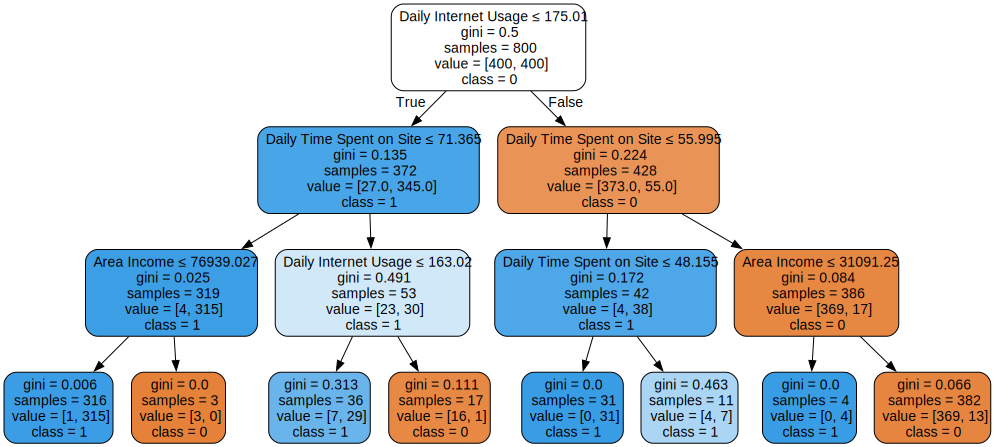

In [27]:
dot_data = export_graphviz(
    dt,
    out_file=None,
    feature_names = x_train.columns,  # x(독립변수)
    class_names=['0', '1'],           # y(sold 여부)
    filled=True,
    rounded=True,
    special_characters=True
)

graph = graphviz.Source(dot_data)
graph

In [28]:
x_train.columns

Index(['Daily Time Spent on Site', 'Area Income', 'Daily Internet Usage',
       'Male', 'Age_20.0', 'Age_21.0', 'Age_22.0', 'Age_23.0', 'Age_24.0',
       'Age_25.0',
       ...
       'Timestamp_7/7/2016 23:32', 'Timestamp_7/7/2016 3:55',
       'Timestamp_7/8/2016 17:14', 'Timestamp_7/8/2016 21:18',
       'Timestamp_7/8/2016 22:30', 'Timestamp_7/8/2016 3:47',
       'Timestamp_7/9/2016 11:04', 'Timestamp_7/9/2016 11:18',
       'Timestamp_7/9/2016 14:55', 'Timestamp_7/9/2016 16:23'],
      dtype='object', length=3246)

In [29]:
import pandas as pd

# 중요도 확인
importances = dt.feature_importances_
importances

array([0.20983021, 0.03748426, 0.75268552, ..., 0.        , 0.        ,
       0.        ], shape=(3246,))

In [30]:
# 데이터프레임으로 정리
feature_importance_df = pd.DataFrame({
    'feature': x_train.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)

print(feature_importance_df)

                       feature  importance
2         Daily Internet Usage    0.752686
0     Daily Time Spent on Site    0.209830
1                  Area Income    0.037484
3244  Timestamp_7/9/2016 14:55    0.000000
2166         Country_Nicaragua    0.000000
...                        ...         ...
1085         City_Bradleyburgh    0.000000
1086          City_Bradleyside    0.000000
1087      City_Bradshawborough    0.000000
1088            City_Bradyfurt    0.000000
3245  Timestamp_7/9/2016 16:23    0.000000

[3246 rows x 2 columns]


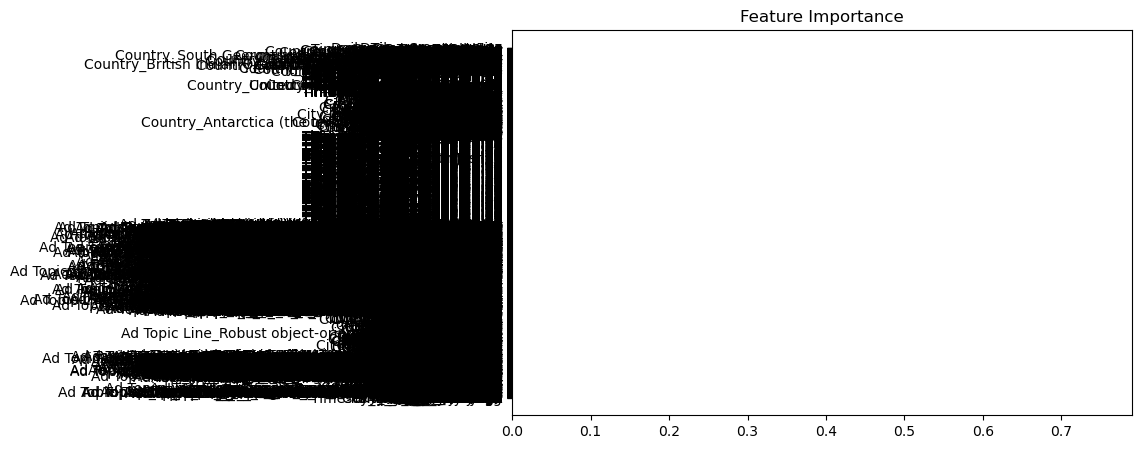

In [34]:
# 데이터프레임을 bar 차트 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
# 수평 바차트
plt.barh(feature_importance_df['feature'],
         feature_importance_df['importance'])
plt.gca().invert_yaxis()
plt.title("Feature Importance")
plt.show()

In [ ]:
# 👉 하루 인터넷 사용량이 광고 클릭 여부를 가장 크게 결정해요.
# 👉 사이트 체류 시간도 중요해요.
# 👉 소득은 영향이 있지만 크지는 않음

# 🎯 최종 해석

# 광고 클릭을 예측하는 핵심 요인은:

# 1️⃣ 인터넷 사용량 (가장 중요)
# 2️⃣ 사이트 체류 시간
# 3️⃣ 소득 (조금 영향)

# 📌 지역, 도시, 특정 시간은 거의 의미 없음